In [1]:
# Adapted from https://www.tensorflow.org/tutorials/keras/classification
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Faris\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Faris\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Faris\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.txa6yqsd3gcqqc22geq54j2udcxdxhwn.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
print(tf.__version__)

2.0.0


In [3]:
# Import the fashion dataset
fashion_mnist = keras.datasets.fashion_mnist

# Train the images in the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Each image is mapped to a label. Since the class names are not included with the dataset
# Gotta store them here to user later when plotting the images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# 60000 images in the dataset with each being 28x28
train_images.shape

(60000, 28, 28)

In [6]:
# 60000 labels in the training set
len(train_labels)

60000

In [7]:
# Each label is an integer between 1 and 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
# 10000 images in the test set with them being 28x28 again
test_images.shape

(10000, 28, 28)

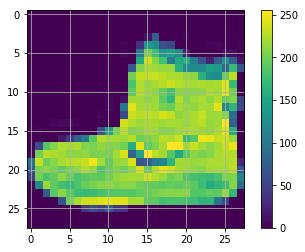

In [13]:
# If the images in the training set are inspected the pixel values fall in the 0-255 range
# Will have to scale the values to a range of 0 to 1 before feeding them to the neural network model
# To accomplish this will divide the values by 255 ~Training set and testing set must be preprocessed in the same way

# Plotting the first image and showing it
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [14]:
# Doing what I said above in the comments, have to equalize their values
train_images = train_images / 255.0
test_images = test_images / 255.0

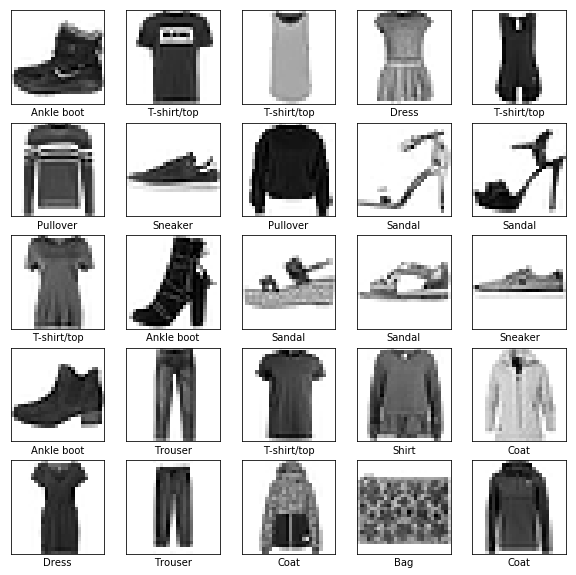

In [15]:
# Verifying the data is in the correct format, displaying the first 25 images from the *training* set
# And also display their class name below for validation
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
model = keras.Sequential([
    # First Layer - Transforms the image formats from a 2D array (of 28 x 28px) to a 1D array (of 28 x 28px)
    # This layer just reformats the data, unstacks rows of pixels and lines them up
    keras.layers.Flatten(input_shape=(28, 28)),
    # Second Layer - Two Dense Layers. Fully connected neural layers. The first layer has 128 neurons(nodes) 
    keras.layers.Dense(128, activation='relu'),
    # 10 neuron softmax layer that returns an array of 10 probability scores that sum up to 1
    # Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes
    keras.layers.Dense(10, activation='softmax')
])

In [20]:
# Before the model can be trained it needs some more settings

# Optimizer -> How the model is updated based on the data it sees and its loss function.
model.compile(optimizer='adam',
# Loss function -> Measures how accurate the model is during training
              loss='sparse_categorical_crossentropy',
# Metrics -> Used to monitor the training and testing steps
              metrics=['accuracy'])

In [21]:
# Train the model

# Training it requires 
# 1) Feeding the model with the trained_images and trained_labels
# 2) The model learns association between the images and labels
# 3) Ask the model to make predictions about a test set. Verify the predictions match the labls from the test_labels array
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4934 - accuracy: 0.8256
Epoch 2/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3718 - accuracy: 0.8649
Epoch 3/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3357 - accuracy: 0.8777
Epoch 4/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3139 - accuracy: 0.8842
Epoch 5/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2943 - accuracy: 0.8925
Epoch 6/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2805 - accuracy: 0.8970
Epoch 7/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2676 - accuracy: 0.9007
Epoch 8/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2568 - accuracy: 0.9051
Epoch 9/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2469 - accuracy: 0.9068
Epoch 10/10
60

In [23]:
# Compare how the model performs on the test dataset, this model reaches an accuracy of up to 88%
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2264 - accuracy: 0.8821

Test accuracy: 0.8821


In [24]:
# Now with the model trained, can use it to make predictions on some images

# The model should have predicted the label for each image in the training set
predictions = model.predict(test_images)

In [25]:
# Checking it has correctly made predictions (above)
predictions[0]

array([3.8472508e-06, 6.2737747e-08, 5.7992253e-07, 2.2451292e-09,
       6.7311625e-08, 7.4483962e-03, 1.0047196e-06, 1.4899037e-02,
       8.4253759e-07, 9.7764617e-01], dtype=float32)

In [26]:
# Can't gauge much from that output, but the array index[9] has the highest confidence value
np.argmax(predictions[0])

9

In [27]:
# The model is confident this image is an ankel boot (class_names[9])
# Examining the test label should confirm this classification is correct

test_labels[0]

9

In [33]:
# Graphing it to look at the full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

![Classes for the dataset](classes.png "Classes")

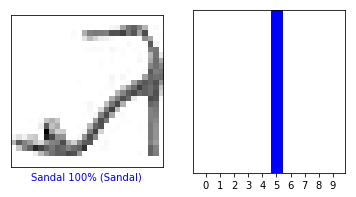

In [52]:
# Looking at the 0th image, prediction and prediction array. Correct prediction labels are blue and red respectively

# A correct prediction
i = 423
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
# An incorrect prediction
i = 42
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

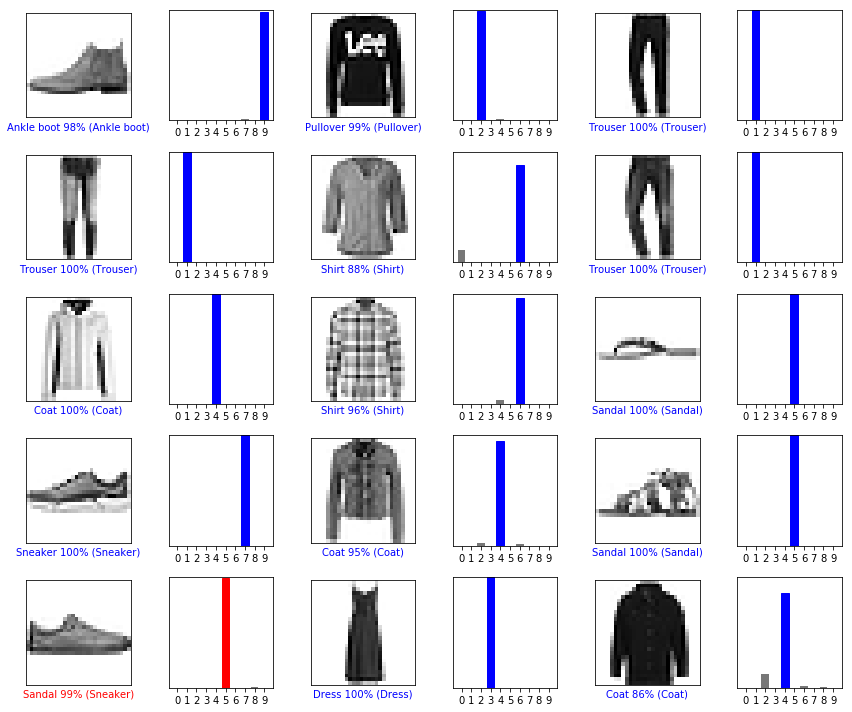

In [53]:
# Plot the first X test images, their predicted labels, and the true labels.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()